# Mean field Floquet dynamics



We introduce the position-momentum conjugate and effective Planck constant $1/N$ the Schroedinger equation becomes-
$$\frac{i}{N} \frac{\partial}{\partial t}\psi_t(q) = \mathcal{H}\psi_t(q)$$
Where hamiltonian 
$$H = -2q^2 -h(t)\sqrt{(1-4q^2)}cos(p)$$
Now we want to find one cycle evolution for Floquet matrix.
The initial condition for wave function is a unitary matrix of which each column is the nth state's initial condition. This means we have to descretize the position as well as momentum space with descrete Hamiltonian.
<br> The position space spans as-
$$
q = (q_0, q_1,q_2,....,q_{N-1})
$$
And momentum is related with position as-
$$
p = \frac{i}{N}\frac{\partial}{\partial q}
$$
So we can write-
$$ \mathcal{H} {|\psi\rangle} = \frac{i}{N}\frac{\partial{|\psi\rangle}}{\partial t}$$
Here the wavefunction-
$$
|\psi \rangle = \left(\begin{array}(
|\psi_0 \rangle\\
|\psi_1 \rangle\\
|\psi_2 \rangle\\
..\\
..\\
|\psi_{N-1} \rangle
\end{array}\right)
$$

Now we can write momentum in descerte space with finite difference method as- 
$$
p^n |\psi\rangle = \frac{i^n}{N^n}\frac{\partial ^n}{\partial q ^n}|\psi\rangle \Longrightarrow^{discrete} \sum_{j=0}^{n} (-1)^j C^{n}_{j} |\psi\rangle_{k+(\frac{n}{2}-j)} = \left(p^n |\psi\rangle \right)_k
$$

<br> McLaurent series for cos(p)-
$$
\left(cos(p) |\psi\rangle \right)_k = \sum_{l=0}^{N} \frac{(-1)^l p^{2l}}{2l!} = \sum_{l=0}^{N} \sum_{j=0}^{l} \frac{(-1)^{(l+j)}}{2l!} C^{l}_{j} |\psi\rangle_{k +(l-j)}
$$

<br> Here j,k,l are integers only.
Now,
$$
\left(\mathcal{H}|\psi\rangle \right)_k = \widetilde{H}_{km} \psi_m
$$
here $C^{n}_{j}$ is for binomial combination.

References:
[1] Check T. Mori's paper equation (12)

running for N =  40 with 2 processors
omega 6.0
omega 6.89261744966443


/home/mahi/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/mahi/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-2-e2b05a14a549>:83: RuntimeWarning: divide by zero encountered in log
  phasefunc = (1j * np.log(evals))/T
<ipython-input-2-e2b05a14a549>:83: RuntimeWarning: invalid value encountered in multiply
  phasefunc = (1j * np.log(evals))/T
<ipython-input-2-e2b05a14a549>:83: RuntimeWarning: invalid value encountered in true_divide
  phasefunc = (1j * np.log(evals))/T


omega 6.046979865771812
omega 6.093959731543624


<ipython-input-2-e2b05a14a549>:83: RuntimeWarning: divide by zero encountered in log
  phasefunc = (1j * np.log(evals))/T
<ipython-input-2-e2b05a14a549>:83: RuntimeWarning: invalid value encountered in multiply
  phasefunc = (1j * np.log(evals))/T
<ipython-input-2-e2b05a14a549>:83: RuntimeWarning: invalid value encountered in true_divide
  phasefunc = (1j * np.log(evals))/T


omega 6.939597315436242
omega 6.140939597315437
omega 6.1879194630872485
omega 6.9865771812080535
omega 6.23489932885906
omega 7.033557046979865
omega 6.281879194630872
omega 6.328859060402684
omega 7.080536912751678
omega 6.375838926174497
omega 6.422818791946309
omega 7.12751677852349
omega 6.469798657718121
omega 6.516778523489933
omega 7.174496644295302
omega 6.563758389261745
omega 7.221476510067114
omega 6.610738255033557
omega 7.268456375838927
omega 6.657718120805369
omega 6.704697986577181
omega 7.315436241610739
omega 6.751677852348993
omega 7.3624161073825505
omega 7.409395973154362
omega 6.798657718120806
omega 6.845637583892618
omega 7.456375838926174
omega 7.785234899328859
omega 7.503355704697986
omega 7.832214765100671
omega 7.550335570469799
omega 7.879194630872483
omega 7.597315436241611
omega 7.644295302013423
omega 7.926174496644295
omega 7.691275167785235
omega 7.973154362416107
omega 7.7382550335570475
omega 8.020134228187919
omega 8.06711409395973
omega 8.6778523

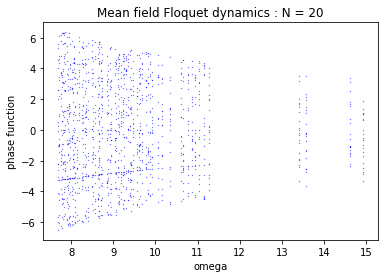

NameError: name 'filename' is not defined

In [2]:
# experiment

import numpy as np
from odeintw import odeintw
import matplotlib.pyplot as plt
from multiprocessing import Pool
from numpy.linalg import multi_dot, norm, eig
import math
import time

start = time.time()

cosp_init = 0.0    
N = 40
h = 25.0
h0 = 0.1
    
q = np.linspace(-0.5, 0.5, N)
omega_range = np.linspace(6.0,13.0,150)
#bessel = [4*h/2.4048255576957, 4*h/5.52007811028631,\
#              4*h/8.65372791291101, 4*h/11.7915344390142, 4*h/14.9309177084877]
bessel = [4*h/11.7915344390142,4*h/8.65372791291101]
omegas = np.hstack((omega_range,bessel))
psi = np.eye(N) + (1j) * np.zeros((N,N))

cosp = np.zeros((N,N)) + (1j) * np.zeros((N,N))
cosp_init = np.zeros((N,N)) + (1j) * np.zeros((N,N))
floqEvoluion_mat = np.zeros((N,N)) + (1j) * np.zeros((N,N))

class Periodic_Lattice(np.ndarray):
    def __new__(cls, input_array, lattice_spacing=None):
        obj = np.asarray(input_array).view(cls)
        obj.lattice_shape = input_array.shape
        obj.lattice_dim = len(input_array.shape)
        obj.lattice_spacing = lattice_spacing
        return obj
    
    def __getitem__(self, index):
        index = self.latticeWrapIdx(index)
        return super(Periodic_Lattice, self).__getitem__(index)
    
    def __setitem__(self, index, item):
        index = self.latticeWrapIdx(index)
        return super(Periodic_Lattice, self).__setitem__(index, item)
    
    def __array_finalize__(self, obj):
        if obj is None: return
        self.lattice_shape = getattr(obj, 'lattice_shape', obj.shape)
        self.lattice_dim = getattr(obj, 'lattice_dim', len(obj.shape))
        self.lattice_spacing = getattr(obj, 'lattice_spacing', None)
        pass
    
    def latticeWrapIdx(self, index):
        if not hasattr(index, '__iter__'): return index         # handle integer slices
        if len(index) != len(self.lattice_shape): return index  # must reference a scalar
        if any(type(i) == slice for i in index): return index   # slices not supported
        if len(index) == len(self.lattice_shape):               # periodic indexing of scalars
            mod_index = tuple(( (i%s + s)%s for i,s in zip(index, self.lattice_shape)))
            return mod_index
        raise ValueError('Unexpected index: {}'.format(index))


def floq_jac(periodic_psi,t, h, h0, w, cosp):
    drive = h0 + h * np.cos(w * t)
    jac = (1j) * N * (-2.0 * q * q - drive * np.sqrt(1.0 - 4.0 * q *q) * cosp)
    return jac

def floq_func(periodic_psi,t,h,h0,w,cosp):
    return np.dot(floq_jac(periodic_psi,t, h0, h, w, cosp), periodic_psi)

def floq_evolv(periodic_psi,h,h0,w,cosp):
    T = 2 * np.pi/w     # time periode
    print("omega",w)
    t = np.linspace(0,2 * np.pi/w,N)      # time range
    floqEvoluion_mat = np.zeros((N,N)) + (1j) * np.zeros((N,N))
    
    for mm in np.arange(N):
        psi0 = periodic_psi[mm]       
        psi_t = odeintw(floq_func,psi0,t,args=(h,h0,w,cosp), Dfun=floq_jac)
        floqEvoluion_mat[mm] = psi_t[N-1]
    
    evals, evecs = eig(floqEvoluion_mat)
    phasefunc = (1j * np.log(evals))/T
    return phasefunc
    
if __name__ == '__main__':
    nprocs = 2
    p = Pool(processes = nprocs)  
    print("running for N = ", N, "with",nprocs,"processors")
    periodic_psi  = Periodic_Lattice(psi)       
    cospinit = 0.0
    
    for k in np.arange(N):
        for m in np.arange(N):
            for l in np.arange(N+1):
                for j in np.arange(l+1):
                    cospinit = cospinit + np.array([pow((-1),(l+j))/math.factorial(2 * l)* \
                                          math.comb(l,j)* periodic_psi[(k+(l-j),(m))]])
            cosp[k,m] = cospinit
            cospinit = 0.0
            
    data = p.starmap(floq_evolv,[(periodic_psi,h,h0,w,cosp) for w in omegas])
    
    print("time taken",time.time()-start,"sec")
    
    for xx, omg in enumerate(omegas):
        #omega = [omg] * N
        omega = [4*h/omg] * N
        plt.scatter(omega,data[xx].real, color='blue', marker='.', s= 0.2)
    plt.title("Mean field Floquet dynamics : N = 20")    
    plt.xlabel("omega")
    plt.ylabel("phase function")
    plt.savefig("n40_fl_mfd.jpeg", dpi=300)
    plt.show()
    np.savetxt(filename,np.vstack((omegas,data)).T)